## Imports

In [55]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_validate, cross_val_score

# Linear Regression

🎯 In this exercise, you will model the performance of an NBA player's win rating (`win_rating`) according to their game statistics (like minutes played, `mp`). 

❓ Load the `NBA.csv` dataset into this notebook as a pandas dataframe, and display its first 5 rows.

In [5]:
%pwd

'/home/parissa/code/ParissaPeimaniyfard/05-ML/01-Fundamentals-of-Machine-Learning/data-linear-regression'

In [18]:
path= '/home/parissa/code/ParissaPeimaniyfard/05-ML/01-Fundamentals-of-Machine-Learning/data-linear-regression'
file= 'NBA.csv'
base_data=pd.read_csv(path+ '/' + file)

In [19]:
base_data.head()

,season,poss,mp,do_ratio,pacing,win_rating
0,1987,4847,2409,-1.546275,-0.599918,1.643091
1,2017,5582,2708,0.996587,0.531888,10.808427
2,2016,4976,2407,0.242598,0.127976,3.054773
3,2021,1178,585,-1.343806,-1.201034,0.230004
4,1988,4534,2056,-1.813990,-0.128997,0.905614


ℹ️ You can read a detailed description of the dataset in the challenge README. Make sure to refer to it throughout the challenge.

## 1. Define Feature Set and Target

🎯 The first objective is to model the players' overall performance rating compared to peers, called *Wins Above Replacement*, (`win_rating`) against the minutes that they've played (`mp`)

❓ Assign those two variables to `X` and `y`. Remember that `X` is the feature(s), and `y` is the target.

In [22]:
data= base_data[['win_rating', 'mp']]
data.head()

,win_rating,mp
0,1.643091,2409
1,10.808427,2708
2,3.054773,2407
3,0.230004,585
4,0.905614,2056


In [23]:
X= data [['mp']]
y=data['win_rating']

👇 In a [scatter plot](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html), visualize the relationship between the rating and the minutes played.

Text(0, 0.5, 'win_rating')

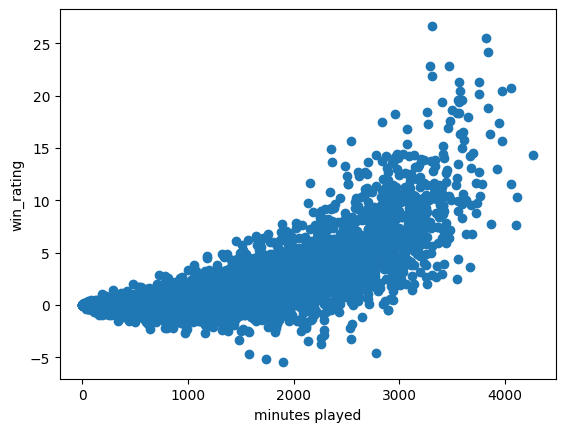

In [29]:
plt.scatter(x=data['mp'], y=data['win_rating'])
plt.xlabel('minutes played')
plt.ylabel('win_rating')

ℹ️ The scatter plot should hint that there is a relationship. But is it a perfectly linear relationship? 🤔 We'll see!

## 2. Cross-Validation

👇 Using Sklearn's [`cross_validate`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_validate.html), run a 5-fold cross-validation on a [`LinearRegression`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) model predicting the player performance rating from minutes played. Save the raw output of the cross-validation under a new variable called `cv_results`.

In [32]:
model= LinearRegression()
cv_results= cross_validate(model, X, y, cv=5)

❓ What is the lowest score of the cross-validation? Compute your answer and save the value under a new variable called `min_score`.

In [38]:
min_score= cv_results['test_score'].min()
min_score

0.5344790822272503

❓ What is the highest score of the cross-validation?  Compute your answer and save the value under a new variable called `max_score`.

In [40]:
max_score= cv_results['test_score'].max()
max_score

0.5791776193355004

❓ What is the mean score of the cross-validation? Compute your answer and save the value under a new variable called `mean_score`.

In [42]:
mean_score= cv_results['test_score'].mean()
mean_score

0.556730180006891

ℹ️ When running a cross-validation, we always look at the mean score as the most robust and representative evaluation of the model's performance.

### ☑️ Test your code

In [43]:
from nbresult import ChallengeResult

result = ChallengeResult(
    'cv_results',
    cv_result = cv_results,
    mean_score = mean_score
)

result.write()
print(result.check())


============================= test session starts ==============================
platform linux -- Python 3.10.6, pytest-7.1.3, pluggy-1.0.0 -- /home/parissa/.pyenv/versions/lewagon/bin/python3
cachedir: .pytest_cache
rootdir: /home/parissa/code/ParissaPeimaniyfard/05-ML/01-Fundamentals-of-Machine-Learning/data-linear-regression/tests
plugins: typeguard-2.13.3, anyio-3.6.2, asyncio-0.19.0
asyncio: mode=strict
collecting ... collected 2 items

test_cv_results.py::TestCvResults::test_cv_mean PASSED                   [ 50%]
test_cv_results.py::TestCvResults::test_cv_results PASSED                [100%]

============================== 2 passed in 0.13s ===============================


💯 You can commit your code:

git add tests/cv_results.pickle

git commit -m 'Completed cv_results step'

git push origin master



❓ Plot the evolution of **<u>total</u> computational time (fitting and scoring)** and **<u>mean</u> score** as `K` increases from 2 to 20.

In [46]:
cv_results

{'fit_time': array([0.01983666, 0.00178313, 0.00131297, 0.00107622, 0.00108314]),
 'score_time': array([0.00175929, 0.00101566, 0.0007987 , 0.00089049, 0.00077128]),
 'test_score': array([0.5555057 , 0.53447908, 0.53790391, 0.57658459, 0.57917762])}

In [96]:
number= np.arange(2,21,1)
number

array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19, 20])

In [45]:
cv_results['fit_time'].sum()

0.025092124938964844

In [113]:
m= range(10)
m

range(0, 10)

Text(0, 0.5, 'tot_fit_time')

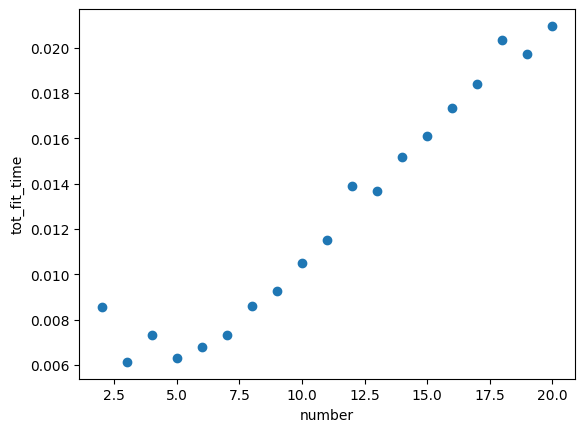

In [126]:
number= np.arange(2,21,1)
tot_fit_time=[]
model= LinearRegression()
for num in number:
    cv_results= cross_validate(model, X, y, cv=num)
    sum= cv_results['fit_time'].sum()
    tot_fit_time.append(sum)
tot_fit_time=np.array(tot_fit_time)
# tot_fit_time
plt.scatter(x=number, y=tot_fit_time)
plt.xlabel('number')
plt.ylabel('tot_fit_time')

Text(0, 0.5, 'tot_score_time')

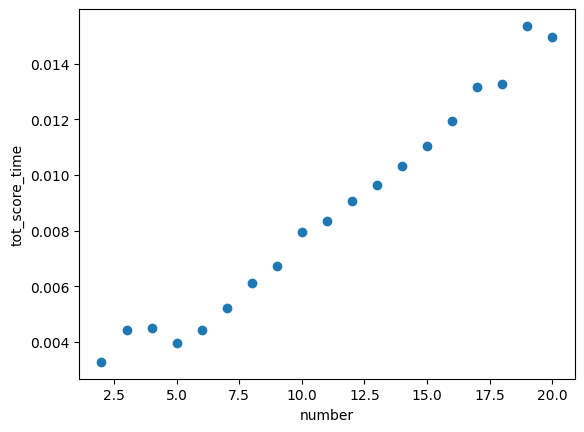

In [125]:
number= np.arange(2,21,1)
tot_score_time=[]
model= LinearRegression()
for num in number:
    cv_results= cross_validate(model, X, y, cv=num)
    sum= cv_results['score_time'].sum()
    tot_score_time.append(sum)
tot_fit_time=np.array(tot_fit_time)
# tot_fit_time
plt.scatter(x=number, y=tot_score_time)
plt.xlabel('number')
plt.ylabel('tot_score_time')

Text(0, 0.5, 'mean_test_score')

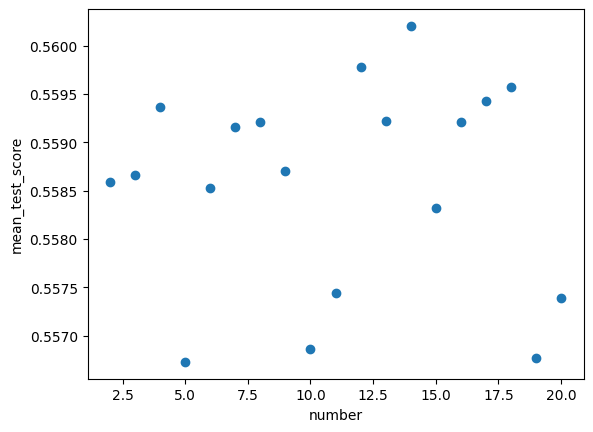

In [132]:
number= np.arange(2,21,1)
mean_test_score=[]
model= LinearRegression()
for num in number:
    cv_results= cross_validate(model, X, y, cv=num)
    mean= cv_results['test_score'].mean()
    mean_test_score.append(mean)
tot_fit_time=np.array(tot_fit_time)
# tot_fit_time
plt.scatter(x=number, y=tot_test_score)
plt.xlabel('number')
plt.ylabel('mean_test_score')

ℹ️ You should see that the $R^2$ score stays stable, which is a good sign that the model performs equally on smaller and larger test sizes. Meanwhile, the computational time keeps increasing. For that reason, we do not exceed K = 10 as a rule of thumb.

## 3. Train the Model

Cross-validation does not train a model, it evaluates a hypothetical model on the dataset. If you want to use the model to, for example, make predictions, you will need to train it outside of the cross-validation.

❓ Go ahead and train the model on the full `X` and `y` (as we've already validated the model's score, and now will use it to predict). Save the trained model under the variable `model`.

In [134]:
model= LinearRegression()
model.fit(X,y)

LinearRegression()

❓ What is the slope of your trained model? It can be accessed via the model's attributes. Save the slope under a variable named `slope`.

In [143]:
slope= model.coef_[0]
slope

0.002602579938640193

❓ What is the intercept of your trained model? It can be accessed via the model's attributes. Save the intercept under a variable named `intercept`.

In [141]:
intercept= model.intercept_
intercept

-1.5463749371639444

🤔 Make sure you understand how to interpret these coefficients before moving on.

### ☑️ Test your code

In [144]:
from nbresult import ChallengeResult

result = ChallengeResult(
    'trained_model',
    slope = slope,
    intercept = intercept
)

result.write()
print(result.check())


============================= test session starts ==============================
platform linux -- Python 3.10.6, pytest-7.1.3, pluggy-1.0.0 -- /home/parissa/.pyenv/versions/lewagon/bin/python3
cachedir: .pytest_cache
rootdir: /home/parissa/code/ParissaPeimaniyfard/05-ML/01-Fundamentals-of-Machine-Learning/data-linear-regression/tests
plugins: typeguard-2.13.3, anyio-3.6.2, asyncio-0.19.0
asyncio: mode=strict
collecting ... collected 2 items

test_trained_model.py::TestTrainedModel::test_intercept PASSED           [ 50%]
test_trained_model.py::TestTrainedModel::test_slope PASSED               [100%]

============================== 2 passed in 0.08s ===============================


💯 You can commit your code:

git add tests/trained_model.pickle

git commit -m 'Completed trained_model step'

git push origin master



## 4. Predict

❓ Use your trained model to predict the performance rating of a player who has played 1000 minutes in total. Save the predicted value in a variable called `prediction`.

In [152]:
new_data= pd.DataFrame({'mp':[1000]})
new_data
prediction= model.predict(new_data)
prediction

array([1.056205])

### ☑️ Test your code

In [153]:
from nbresult import ChallengeResult

result = ChallengeResult(
    'prediction',
    prediction = prediction
)

result.write()
print(result.check())


============================= test session starts ==============================
platform linux -- Python 3.10.6, pytest-7.1.3, pluggy-1.0.0 -- /home/parissa/.pyenv/versions/lewagon/bin/python3
cachedir: .pytest_cache
rootdir: /home/parissa/code/ParissaPeimaniyfard/05-ML/01-Fundamentals-of-Machine-Learning/data-linear-regression/tests
plugins: typeguard-2.13.3, anyio-3.6.2, asyncio-0.19.0
asyncio: mode=strict
collecting ... collected 1 item

test_prediction.py::TestPrediction::test_prediction PASSED               [100%]

============================== 1 passed in 0.08s ===============================


💯 You can commit your code:

git add tests/prediction.pickle

git commit -m 'Completed prediction step'

git push origin master



## 5. Improving the Model with More Features

Your friend who enjoys the NBA fantasy league comes to you with some insights 🏀

They say that when evaluating a player's Wins Above Replacement rating, they would typically also look at the number of ball possessions (`poss`), their defense/offense ratio, and their pacing.

❓ Visualize the correlation between these new features and the `win_rating`. You can use `matplotlib` or `seaborn`. Which **one** of the above features would you consider adding to your model?

<AxesSubplot:>

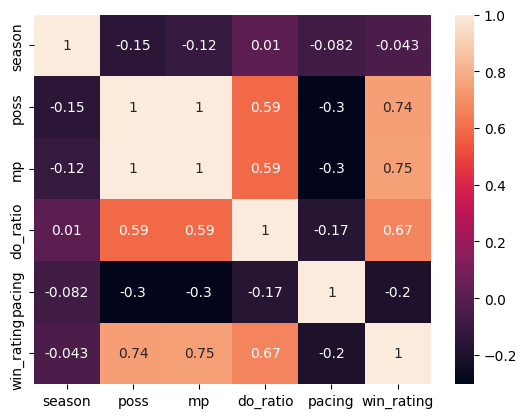

In [189]:
corr= base_data.corr(method='pearson')
sns.heatmap(corr, annot=True)

<AxesSubplot:xlabel='pacing', ylabel='win_rating'>

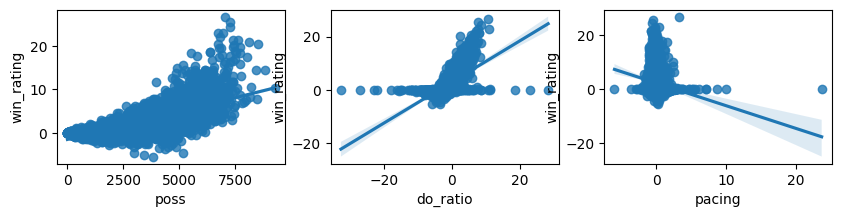

In [173]:
plt.figure(figsize=(10,2))
plt.subplot(1,3,1)
sns.regplot(x='poss', y='win_rating' , data=base_data)
plt.subplot(1,3,2)
sns.regplot(x='do_ratio', y='win_rating', data= base_data)
plt.subplot(1,3,3)
sns.regplot(x='pacing', y='win_rating', data= base_data)

<details>
    <summary>💡 Click here for a hint</summary>
    A seaborn <code>regplot</code> might be very handy here.
</details>

Now let's see if the model with two features (the new one you picked and `mp`) is better at predicting a player's rating than our first model.

❓ Create a new set of features - it should be a DataFrame with two columns.

In [194]:
new_features= base_data[['mp', 'do_ratio']]
new_features.head()

,mp,do_ratio
0,2409,-1.546275
1,2708,0.996587
2,2407,0.242598
3,585,-1.343806
4,2056,-1.813990


❓ Now cross-validate a new linear regression model and save the **mean** score to `mean_2_feat_score`.

> Note: if you only care about the cross-validation score, you can use sklearn's [`cross_val_score`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html)

In [195]:
X_new=new_features[['mp', 'do_ratio']]
y_new= base_data['win_rating']
model= LinearRegression()
cv_results= cross_validate(model, X_new, y_new, cv=5)
mean_2_feat_score= cv_results['test_score'].mean()
mean_2_feat_score

0.6317728310765246

### ☑️ Test your code

In [191]:
from nbresult import ChallengeResult

result = ChallengeResult(
    'improved_score',
    improved_score = mean_2_feat_score
)

result.write()
print(result.check())


============================= test session starts ==============================
platform linux -- Python 3.10.6, pytest-7.1.3, pluggy-1.0.0 -- /home/parissa/.pyenv/versions/lewagon/bin/python3
cachedir: .pytest_cache
rootdir: /home/parissa/code/ParissaPeimaniyfard/05-ML/01-Fundamentals-of-Machine-Learning/data-linear-regression/tests
plugins: typeguard-2.13.3, anyio-3.6.2, asyncio-0.19.0
asyncio: mode=strict
collecting ... collected 1 item

test_improved_score.py::TestImprovedScore::test_improved_score FAILED    [100%]

=================================== FAILURES ===================================
____________________ TestImprovedScore.test_improved_score _____________________

self = <tests.test_improved_score.TestImprovedScore testMethod=test_improved_score>

    def test_improved_score(self):
>       self.assertGreater(self.result.improved_score, 0.6, "Did you pick the right feature?")
E       AssertionError: 0.5475199522534355 not greater than 0.6 : Did you pick the right featu

You should see an **increase of around 8%** in your $R^2$ 👏

Congrats, you just performed your first manual *feature selection* - we'll see more ways to do that this week!

🤔 But is this the best we can do with Linear Regression? Let's explore more in the next challenge!

# 🏁